In [2]:
from pyforest import *

In [4]:
# Importing the dataset
ec_df = pd.read_csv('Ecommerce Customers')
ec_df.head()

<IPython.core.display.Javascript object>

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**EDA (Exploratory Descriptive Analysis)**

In [7]:
ec_df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [6]:
# Checking data types
ec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Email, Address and Avatar have more unique values so dropping these columns**

In [10]:
# Dropping the unnecessary columns
ec_df.drop(columns = ['Email','Address','Avatar'],axis=1,inplace=True)
ec_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
# Checking for null values
ec_df.isnull().sum()


Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

No column with mmissing values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_10496/3534820385.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ec_df['Yearly Amount Spent'])


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

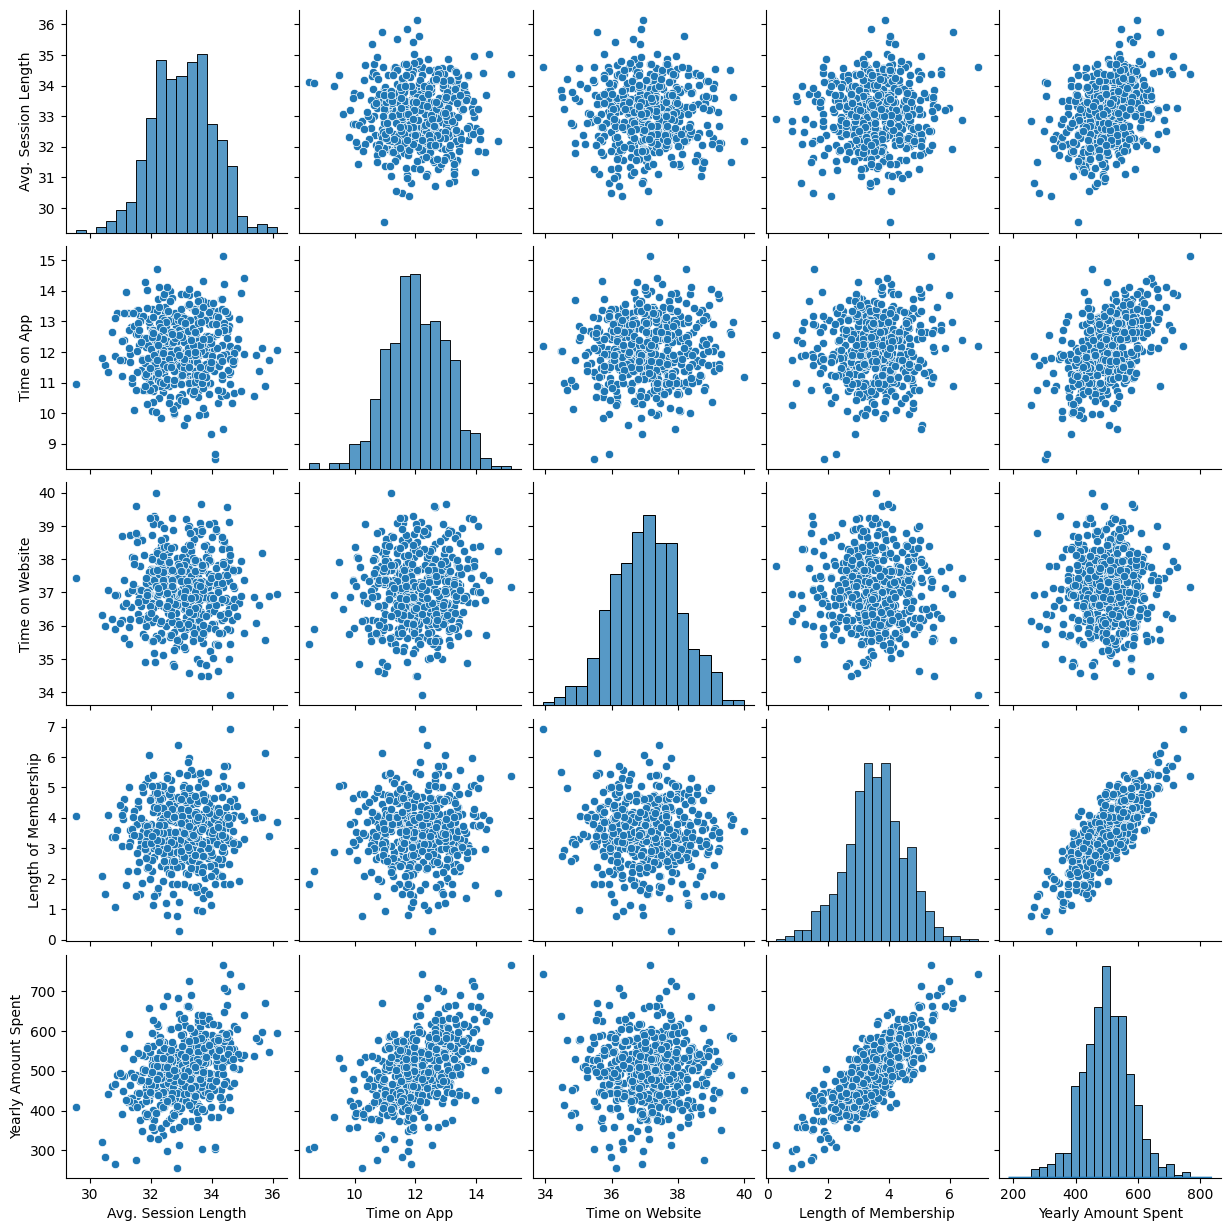

In [13]:
# Visualizing the data
sns.pairplot(ec_df)

# Visualizing the distribution of the target variable
sns.distplot(ec_df['Yearly Amount Spent'])


**From the distribution it is observed that data is normally distribured**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

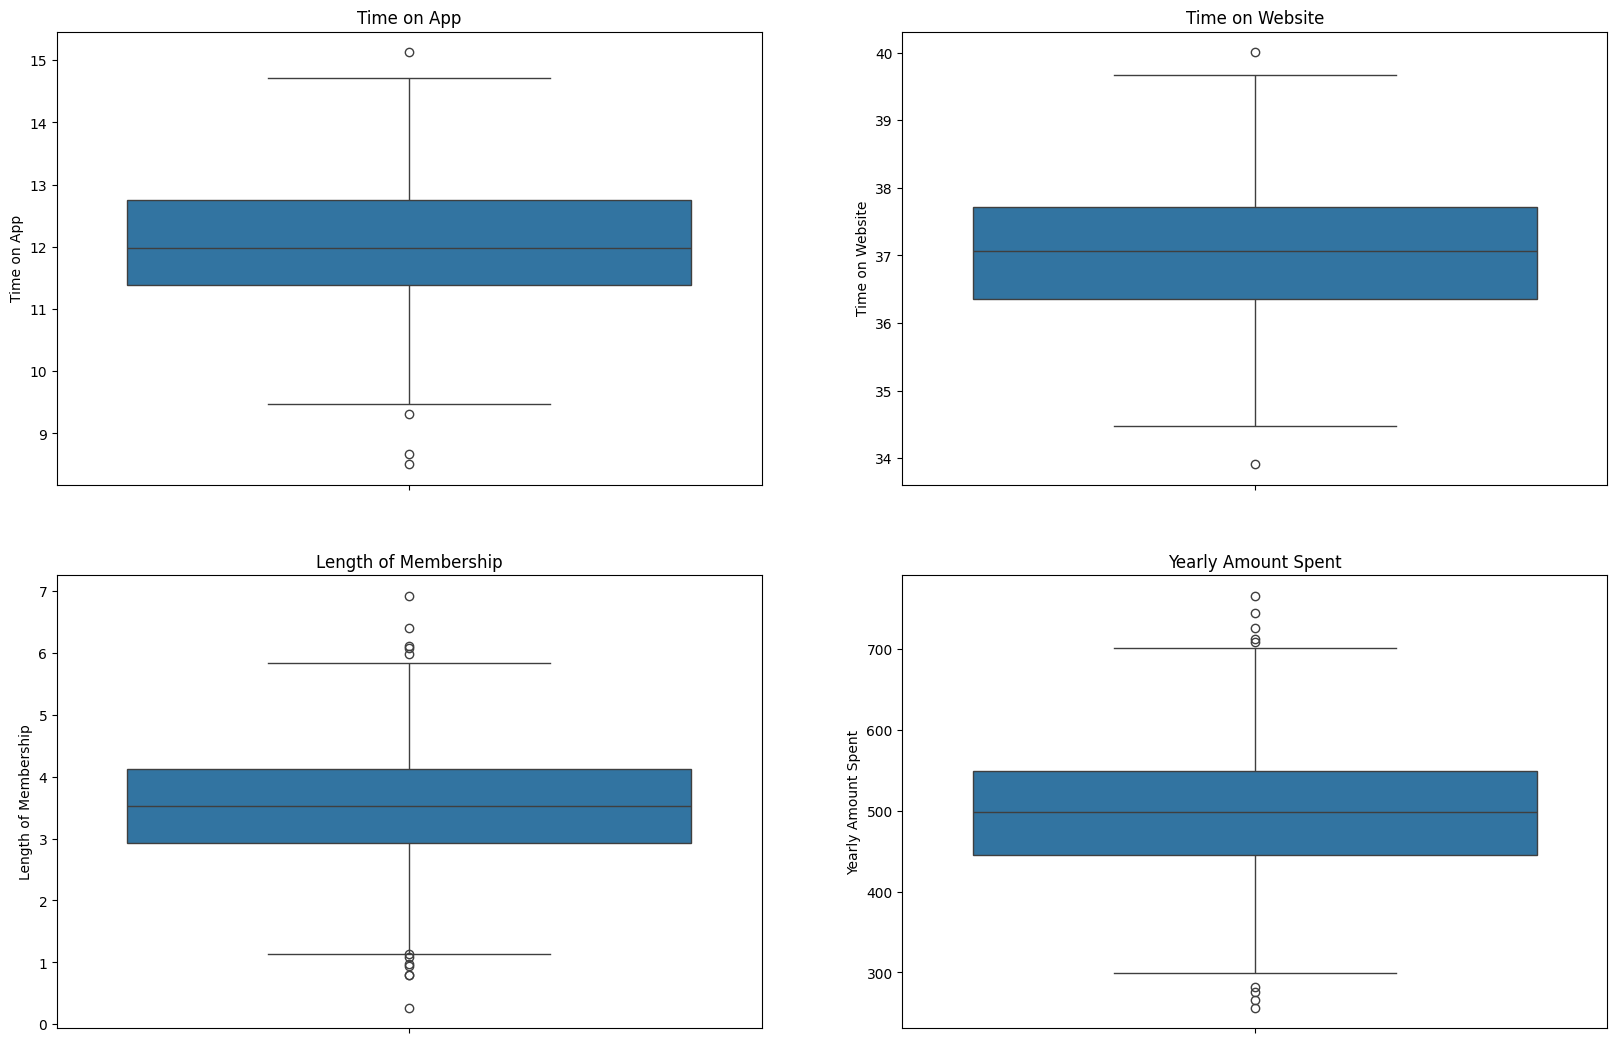

In [17]:
# Checking for outliers in each column on same grid
plt.figure(figsize=(20,20))
for i in range(1,ec_df.shape[1]):
    plt.subplot(3,2,i)
    sns.boxplot(ec_df.iloc[:,i])
    plt.title(ec_df.columns[i])
plt.show()

**Presence of certain amount of outliers is detected**

In [20]:
# Removing outliers using IQR
Q1 = ec_df.quantile(0.25)
Q3 = ec_df.quantile(0.75)
IQR = Q3 - Q1
ec_df = ec_df[~((ec_df < (Q1 - 1.5 * IQR)) |(ec_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ec_df.shape

(476, 5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

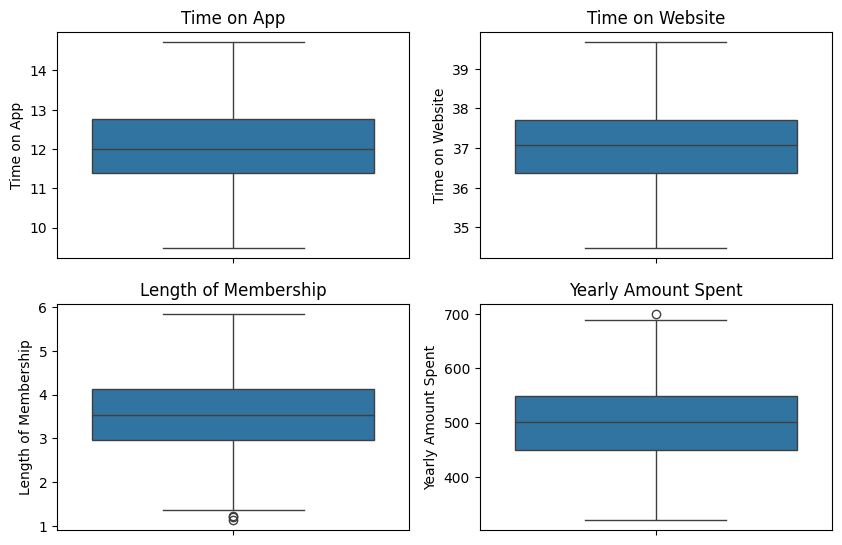

In [21]:
# Visualizing the distribution of the target variable after removing outliers
plt.figure(figsize=(10,10))
for i in range(1,ec_df.shape[1]):
    plt.subplot(3,2,i)
    sns.boxplot(ec_df.iloc[:,i])
    plt.title(ec_df.columns[i])

Data is almost as we wanted, we can ignore small number of outliers in 1 feature if it doesnot have high correlation with target variable 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

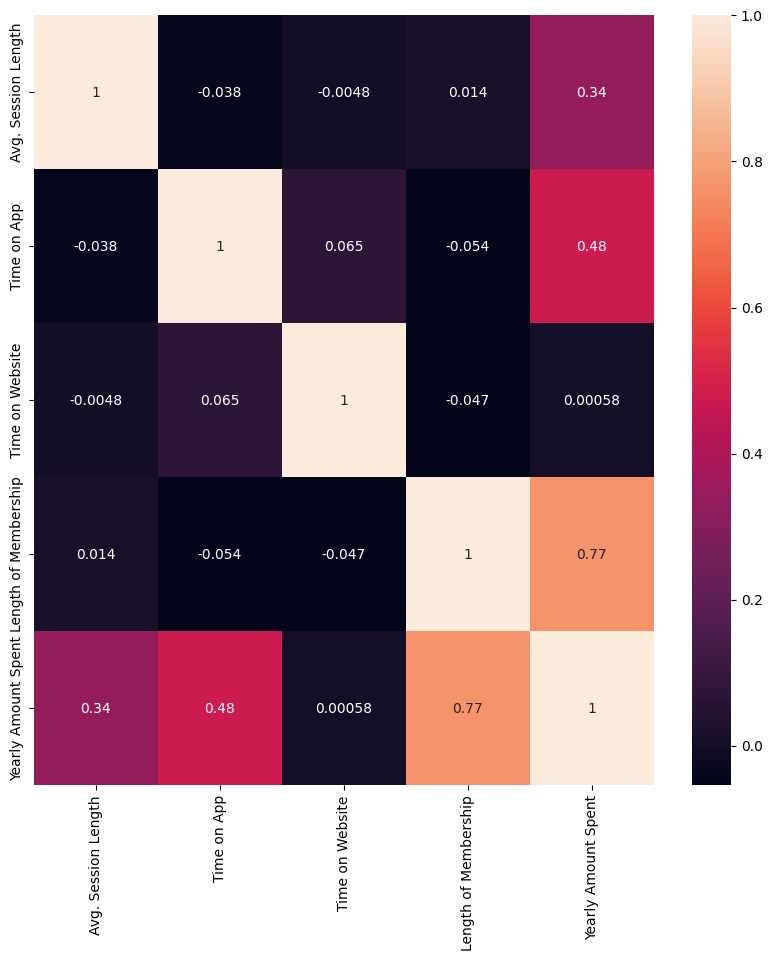

In [22]:
# Checking for correlation
plt.figure(figsize=(10,10))
sns.heatmap(ec_df.corr(),annot=True)

**As Company is trying to figure out whether to focus on Mobile app or website.**

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ec_df.iloc[:,1:] = sc.fit_transform(ec_df.iloc[:,1:])
ec_df.head()

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_10496/2511246266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_df.iloc[:,1:] = sc.fit_transform(ec_df.iloc[:,1:])


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,0.613486,2.521732,0.596232,1.254284
1,31.926272,-1.006351,0.199862,-0.982792,-1.554081
2,33.000915,-0.775016,0.040598,0.620634,-0.186203
3,34.305557,1.725926,-0.350936,-0.475059,1.166786
4,33.330673,0.759669,0.469082,1.001051,1.418630


In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = ec_df.iloc[:,1:]
y = ec_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

*Building the model*

In [25]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8279280651917812

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Actual vs Predicted')

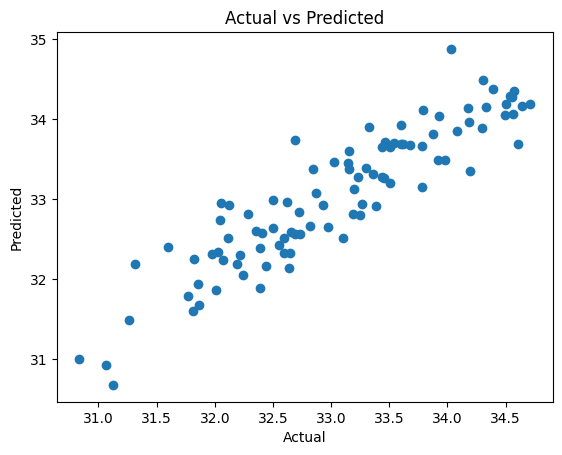

In [27]:
# Visualizing the results
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [29]:
# Visualizing the model intercept and coefficients
print(regressor.intercept_)
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df


33.03914947324918
[-1.23421084 -0.01260741 -1.84105242  2.31383764]


<IPython.core.display.Javascript object>

,Coefficient
Time on App,-1.234211
Time on Website,-0.012607
Length of Membership,-1.841052
Yearly Amount Spent,2.313838


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

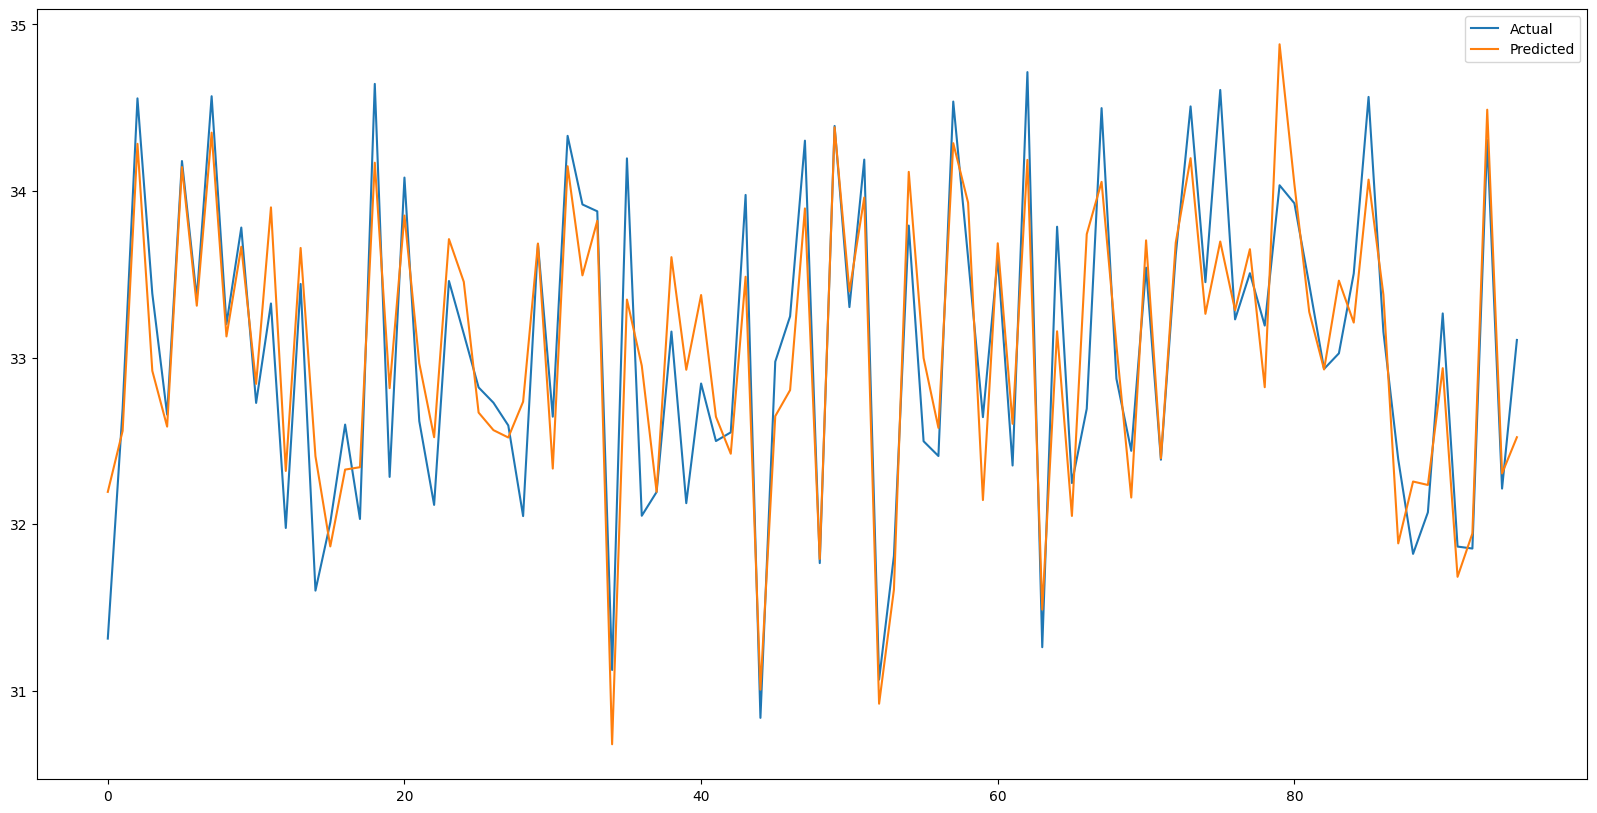

In [32]:
# Visualizing Actual vs Predicted values from the model
plt.figure(figsize=(20,10))
plt.plot(y_test.values,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

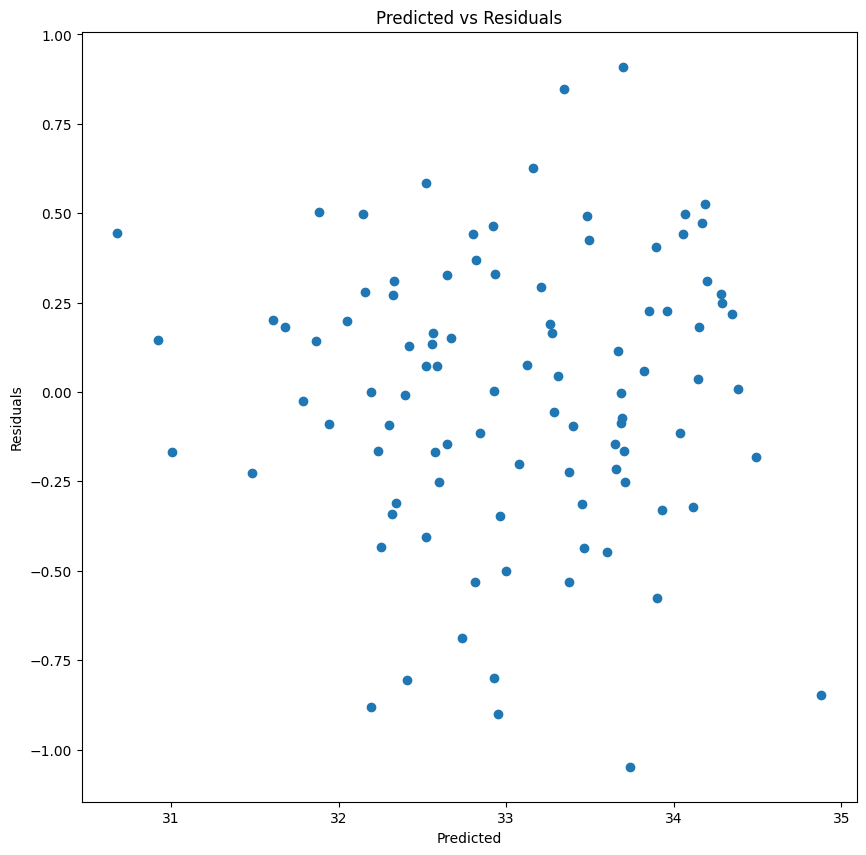

In [33]:
# Visualizing the residuals
plt.figure(figsize=(10,10))
plt.scatter(y_pred,y_test-y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

***Hence Company Should focus more on App rather then Website. Also App has more correlation with Yearly time***